In [10]:
!pip install lightgbm
!pip install xgboost


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 3.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 3.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 2.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 2.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 2.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 2.8 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
from xgboost import XGBClassifier


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

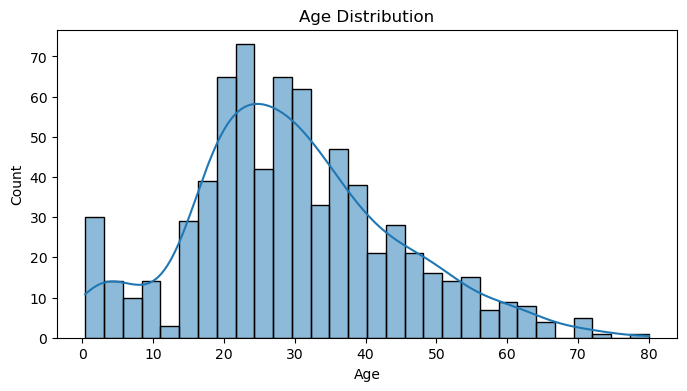

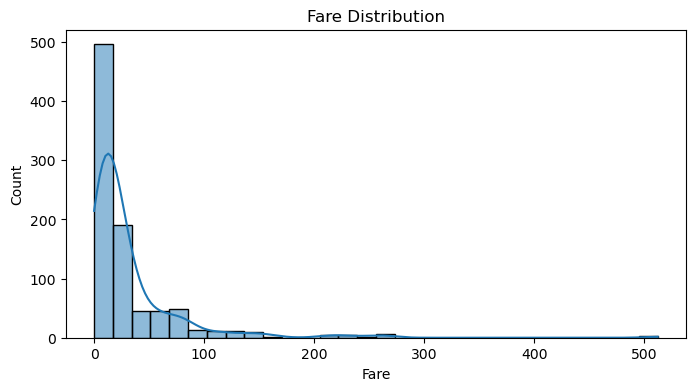

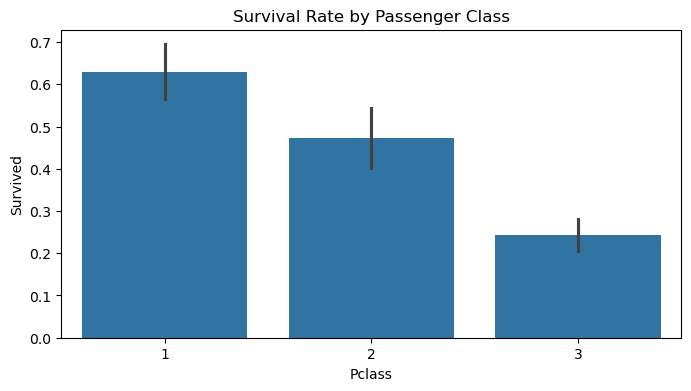

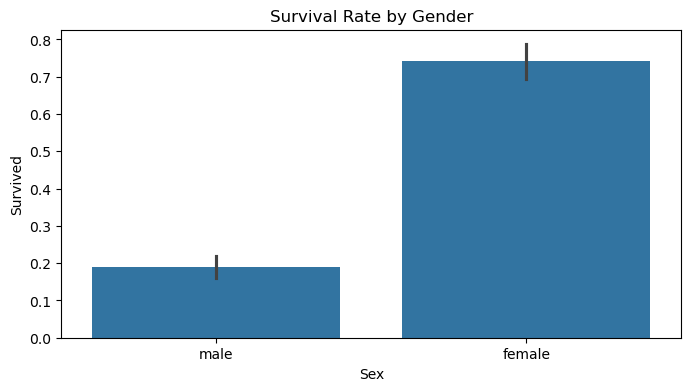

In [12]:
# Load dataset
df = pd.read_csv('titanic.csv')  # Replace with your dataset's actual path

# Check basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Visualize distributions of numerical features
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.show()

# Explore relationships between features and survival
plt.figure(figsize=(8, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


In [13]:
# Impute missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Split dataset into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
lgb_y_pred = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
lgb_precision = precision_score(y_test, lgb_y_pred)
lgb_recall = recall_score(y_test, lgb_y_pred)
lgb_f1 = f1_score(y_test, lgb_y_pred)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [15]:
# Train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)


C:\Users\punee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:24:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
lgb_params = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}
grid_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42),
                        param_grid=lgb_params, cv=3, scoring='accuracy', verbose=1)
grid_lgb.fit(X_train, y_train)

# Best params and model
print("Best LightGBM Parameters:", grid_lgb.best_params_)
lgb_best_model = grid_lgb.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [17]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}
grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        param_grid=xgb_params, cv=3, scoring='accuracy', verbose=1)
grid_xgb.fit(X_train, y_train)

# Best params and model
print("Best XGBoost Parameters:", grid_xgb.best_params_)
xgb_best_model = grid_xgb.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\punee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\punee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\punee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\punee\anaconda3\Lib\site-packages\

Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


C:\Users\punee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:26:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:
# Evaluate tuned models
models = {
    'LightGBM': lgb_best_model,
    'XGBoost': xgb_best_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("-" * 30)


LightGBM Performance:
Accuracy: 0.83
Precision: 0.81
Recall: 0.76
F1-Score: 0.78
------------------------------
XGBoost Performance:
Accuracy: 0.82
Precision: 0.83
Recall: 0.70
F1-Score: 0.76
------------------------------


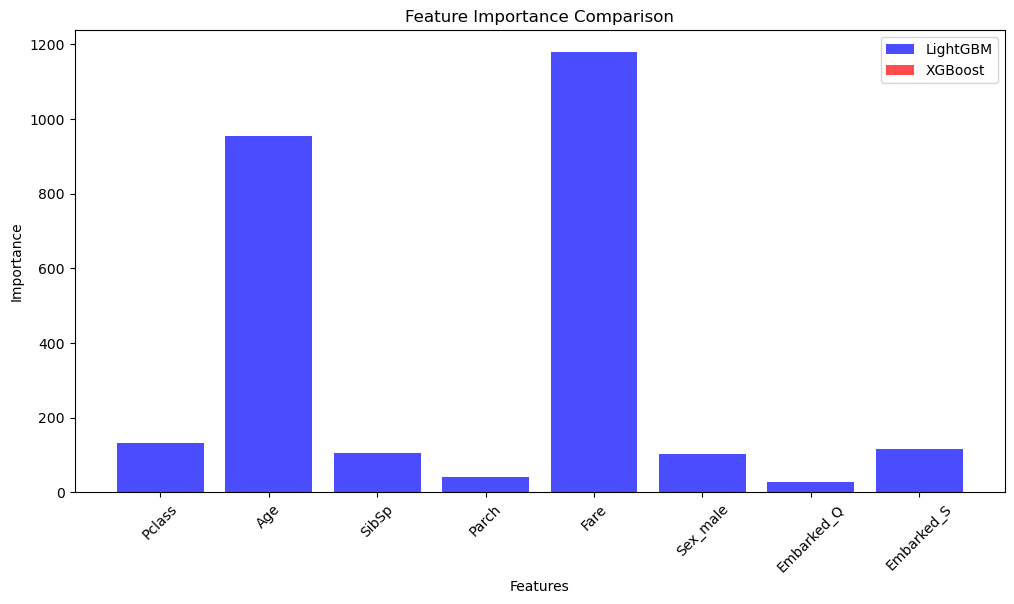

In [19]:
# Feature importance comparison
lgb_importance = lgb_best_model.feature_importances_
xgb_importance = xgb_best_model.feature_importances_

plt.figure(figsize=(12, 6))
plt.bar(X.columns, lgb_importance, alpha=0.7, label='LightGBM', color='b')
plt.bar(X.columns, xgb_importance, alpha=0.7, label='XGBoost', color='r')
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend()
plt.xticks(rotation=45)
plt.show()
